In [1]:
import h5py
import xarray as xr
import imageio
import matplotlib.pyplot as plt
import os
import numpy as np
import tidy3d as td
import matplotlib
import matplotlib.patches as patches
import matplotlib.colors as mcolors
from scipy.fft import fftn, ifftn, fftshift
from scipy.interpolate import interp1d
from scipy.signal import argrelextrema
import sys
import scipy
from scipy.ndimage import gaussian_filter1d
# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(rf'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

tidy3dAPI = os.environ["API_TIDY3D_KEY"]
plt.rc('font', family='Arial')

In [2]:
data = AM.read_hdf5_as_dict("./data/field_data_12x_raw_field_Ex_Ey_Ez_lambda0_5p65.h5")
data_2 = AM.read_hdf5_as_dict("./data/field_data_12x_raw_field_Ex_Ey_Ez_lambda0_3p35.h5")
data_3 = {**data, **data_2}
del data, data_2


In [7]:
def PR(intensity_array,x,y):
    intensity = intensity_array
    integral_1 = scipy.integrate.simpson(scipy.integrate.simpson(intensity**2, x=y, axis=1), x=x, axis=0)
    integral_2 = scipy.integrate.simpson(scipy.integrate.simpson(intensity, x=y, axis=1), x=x, axis=0)**2
    
    return 2*np.sqrt((integral_2/integral_1)/np.pi)

C:\Users\HernandF\AppData\Local\Temp\ipykernel_22628\3904398065.py:6: RuntimeWarning: divide by zero encountered in divide
  return 2*np.sqrt((integral_2/integral_1)/np.pi)
C:\Users\HernandF\AppData\Local\Temp\ipykernel_22628\3904398065.py:6: RuntimeWarning: invalid value encountered in divide
  return 2*np.sqrt((integral_2/integral_1)/np.pi)


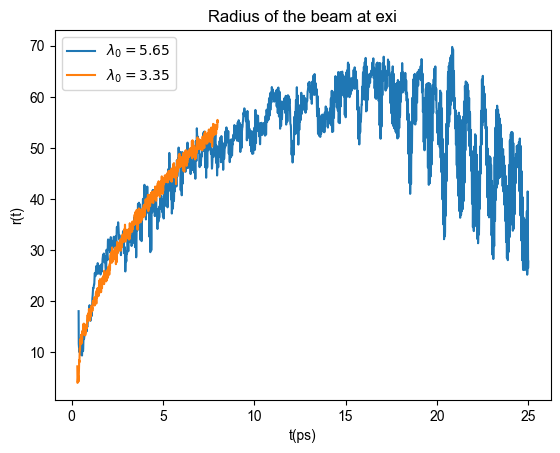

In [8]:

for key in data_3.keys():
    intensity_values = (np.abs(data_3[key]["Ex"])**2 + np.abs(data_3[key]["Ey"])**2 + np.abs(data_3[key]["Ez"])**2).squeeze()
    ipr = PR(intensity_values,data_3[key]["x"],data_3[key]["y"])
    plt.plot((data_3[key]["t"]*1e12)[:],ipr[:],label=rf"$\lambda_0={key}$")

plt.xlabel("t(ps)")
plt.ylabel("r(t)")
# plt.yscale("log")
plt.legend()
plt.title(rf"Radius of the beam at exi")
plt.show()

